In [1]:
# Tim H 2024
# Video(s) that I followed along with for this Jupyter Notebook
# https://app.pluralsight.com/ilx/video-courses/clips/e72534b4-4864-4e7f-96ef-7ca1be42ea71

# data source:
# https://finance.yahoo.com/quote/%5EGSPC/history?period1=536371200&period2=567907200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

sns.set_theme(style="darkgrid")

In [3]:
sp_data = pd.read_csv('SP_500_1987.csv')
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,12/31/1986,243.37,244.03,241.28,242.17,242.17,139200000
1,1/2/1987,242.17,246.45,242.17,246.45,246.45,91880000
2,1/5/1987,246.45,252.57,246.45,252.19,252.19,181900000
3,1/6/1987,252.20,253.99,252.14,252.78,252.78,189300000
4,1/7/1987,252.78,255.72,252.65,255.33,255.33,190900000


In [4]:
sp_data.describe()


,Open,High,Low,Close,AdjClose,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,286.964466,289.328063,284.412095,286.978617,286.978617,1.888044e+08
std,28.923683,28.241142,29.535528,28.889053,28.889053,5.534613e+07
min,223.980000,225.770000,216.460000,223.920000,223.920000,8.636000e+07
25%,267.840000,270.400000,264.310000,267.840000,267.840000,1.619000e+08
50%,290.520000,292.470000,288.340000,290.520000,290.520000,1.819000e+08
75%,308.940000,310.270000,307.420000,308.960000,308.960000,1.984000e+08
max,336.770000,337.890000,334.460000,336.770000,336.770000,6.081000e+08


In [5]:
sp_data.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
AdjClose    float64
Volume        int64
dtype: object

In [6]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'])
sp_data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume               int64
dtype: object

Text(0.5, 1.0, 'S&P 500 1987')

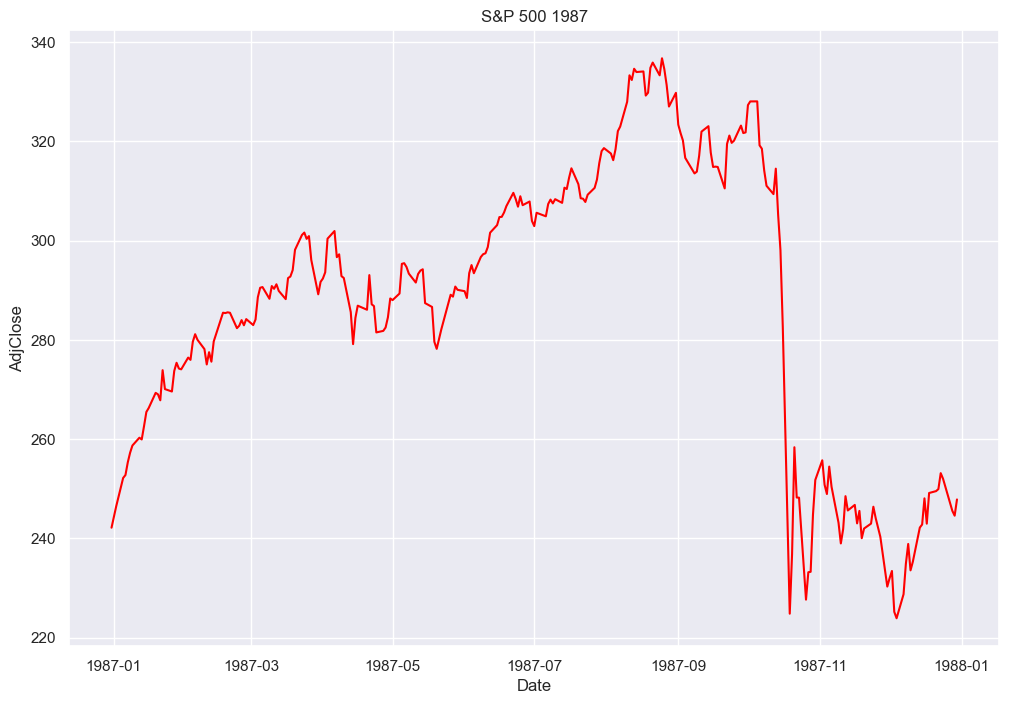

In [7]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=sp_data, x='Date', y='AdjClose', color='red')
plt.title('S&P 500 1987')

In [8]:
sp_data['Returns'] = sp_data['AdjClose'].pct_change()
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
0,1986-12-31,243.37,244.03,241.28,242.17,242.17,139200000,NaN
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,91880000,0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,181900000,0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,189300000,0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,190900000,0.010088


In [9]:
sp_data.dropna(how='any', inplace=True)
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,91880000,0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,181900000,0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,189300000,0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,190900000,0.010088
5,1987-01-08,255.36,257.28,254.97,257.28,257.28,194500000,0.007637


In [10]:
sp_data.shape

(252, 8)

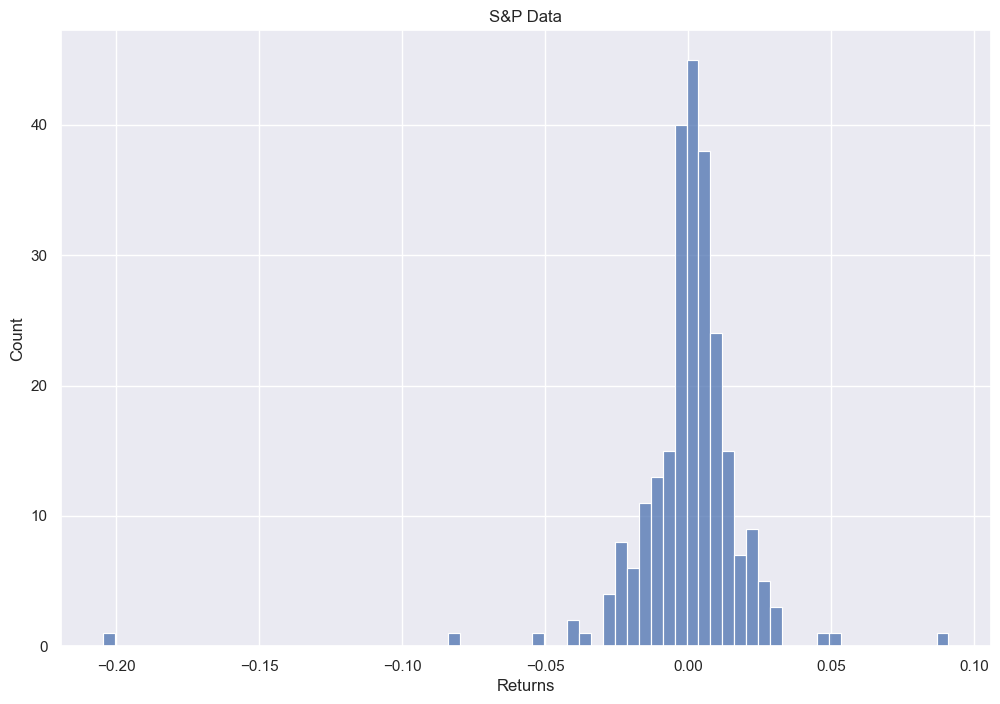

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(data=sp_data, x='Returns')

plt.title('S&P Data')
plt.show()

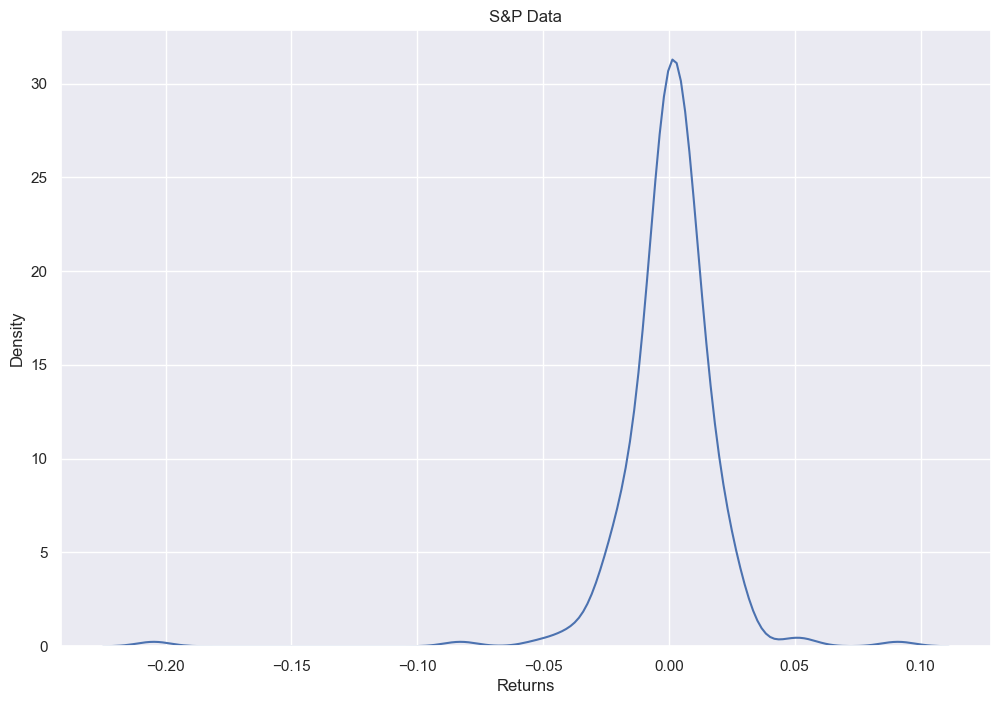

In [12]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=sp_data, x='Returns')

plt.title('S&P Data')
plt.show()

In [13]:
sp_data['Returns'].skew(axis=0)

-4.063006900553241

In [14]:
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(-4.038782236530137,
 0.033689707286255054,
 -0.11690104948849872,
 -0.06460582304845877)

In [15]:
# normally distributed data has a kurtosis of 3, so 43 is huge
sp_data['Returns'].kurtosis(axis=0)

43.302749862695954

In [16]:
sm.stats.stattools.robust_kurtosis(sp_data['Returns'], excess=True)

(42.42461267897301, 0.5260629102317422, 1.1767790081095497, 1.350873758059222)

In [17]:
sp_data_without_oct19 = sp_data[sp_data['Date'] != '1987-10-19']
sp_data_without_oct19.shape

(251, 8)

In [18]:
sm.stats.stattools.robust_skewness(sp_data_without_oct19['Returns'])

(0.017513164647138143,
 0.04202122301747493,
 -0.04955418277064157,
 -0.03306593887076004)

In [19]:
sm.stats.stattools.robust_kurtosis(sp_data_without_oct19['Returns'], excess=True)

(7.587148622145325, 0.5143641446322276, 0.7746063448479199, 1.299285954181316)